# Linear Regression 

In [2]:

def Example_one_feature():
   #Example proposing theta0 => 1 , theta1 => 2/3, "x0 is always 1" the function will be(y=1x0 + 2/3x)
    x = np.array([[5],[3],[0],[4]])
    y = np.array([[4], [4], [1], [3]])
    theta = np.array([[1],[2/3]]) 
    
    return x,y,theta

def Example_multy_features():
    #Example proposing theta0 => 0.1 , theta1 => 0.2, theta2 => 0.3, theta3 => 0.4, "x0 is always 1", the function will be(y=0.1 + 0.2x1 +0.3x2 +0.4x3)
    random.seed(42)

    x = np.random.randint(10,size=(20,3))
    y = np.random.randint(10,size=(20,1))
    theta = np.array([[0.1], [0.2], [0.3], [0.4]])
    
    return x, y, theta
    

# Cost Function

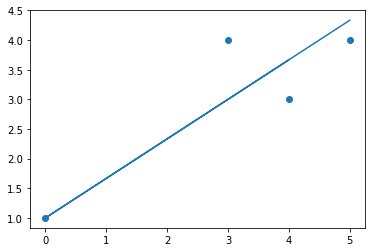

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

#CostFunction => Compute cost for linear regression
def CostFunction (x, y, theta): 
    m = len(x) #the number of values
    one = np.ones([m,1]) 
    x = np.concatenate((one,x),axis=1) #puts a column of ones in x
    
    predictions = x@theta
    sqerrors = (predictions - y)**2
    J = (1/(2*m)) * sum(sqerrors) #the cost function
    
    return (J)
    
x, y, theta = Example_one_feature()
J = CostFunction(x,y,theta)

plt.scatter(x,y)
plt.plot(x,(1+2/3*x))

In [5]:
#CostFunctionMulti => Compute cost for linear regression with multiple variables

def CostFunctionMulti(x, y, theta):
    m = len(x) #the number of values
    one = np.ones([m,1]) #a vector of ones
    x = np.concatenate((one,x),axis=1) #puts a column of ones in x
    
    predictions =  x@theta
    errors = (predictions - y).T@x
    J = 1/(m) * errors
    
    return (J)

x, y, theta = Example_multy_features()

J = CostFunctionMulti(x, y, theta)
J

array([[-0.845, -3.99 , -1.68 , -3.125]])

# Normal Equation

[[1.28571429]
 [0.57142857]]
[[ 4.68271278]
 [-0.25023844]
 [-0.21698508]
 [ 0.22859195]]


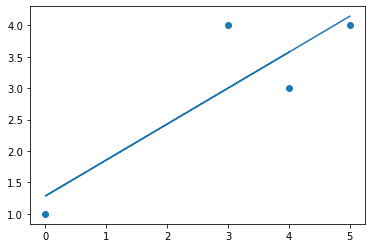

In [7]:
# NormalEq => Computes the closed-form solution to linear regression
import numpy as np
from matplotlib import pyplot as plt
import random
import pandas as pd

def NormalEq (x, y):
    m,c = np.shape(x)
    m = len(x) #the number of values
    one = np.ones([m,1]) #a vector of ones
    x = np.concatenate((one,x),axis=1) #puts a column of ones in x
    
    theta = np.zeros([c,1]) #an array with zeros for theta
    theta = (np.linalg.inv(x.T@x))@x.T@y

    return theta

#One Feature
x, y, theta = Example_one_feature()
theta = NormalEq(x,y) #the best thetas to create a function 
print(theta)

plt.scatter(x,y)
plt.plot(x,(theta[0]+theta[1]*x))

#Example with multiple features
x, y, theta = Example_multy_features()
theta = NormalEq(x,y) #the best thetas to create a function 
print(theta)

# Regularization Normal Ecuation 

[[1.29787234]
 [0.56737589]]


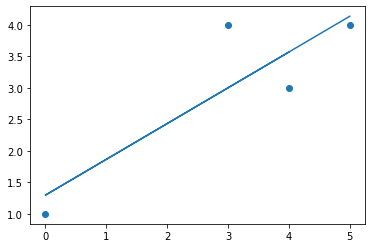

In [8]:
def NormalEq_Reg (x, y, Lambda):
    m,c = np.shape(x) #m => values , c => features
    one = np.ones([m,1]) #a vector of ones
    x = np.concatenate((one,x),axis=1) #puts a column of ones in x
    
    I = np.eye(c+1) #Matriz Idenditad 
    I[0] = np.zeros(c+1) #Matriz identidad con primera fila en ceros 
    
    theta = np.zeros([c,1]) #an array with zeros for theta
    theta = (np.linalg.inv(x.T@x + Lambda*I))@x.T@y

    return theta




#Example with multiple features
x, y, theta = Example_multy_features()
theta = NormalEq_Reg(x, y, 0.1) #the beast thetas to create a function

#Example with only one feature
x, y, theta = Example_one_feature()
theta = NormalEq_Reg(x,y,0.1) #the best thetas to create a function 
print(theta)

plt.scatter(x,y)
plt.plot(x,(theta[0]+theta[1]*x))

# Gradient Decent 

[[1.0627135 ]
 [0.62610577]] [0.19027778 0.18931736 0.18871996 0.18818649 0.1876843  0.18720867
 0.1867579  0.18633066 0.18592571 0.1855419 ]
[[ -90467.9434894 ]
 [-557298.15670648]
 [-525528.7829097 ]
 [-461787.08087245]] [[-5.68200000e-01  5.92500000e-02  4.56000000e-01  1.08140000e+00]
 [-1.25660725e+00 -4.01645925e+00 -3.54955525e+00 -2.92045500e+00]
 [ 4.18879270e+00  2.95805642e+01  2.80347032e+01  2.46745011e+01]
 [-3.77863202e+01 -2.28988674e+02 -2.15851489e+02 -1.89678773e+02]
 [ 2.86492574e+02  1.76859058e+03  1.66782068e+03  1.46550879e+03]
 [-2.21812917e+03 -1.36602308e+04 -1.28814815e+04 -1.13190970e+04]
 [ 1.71272826e+04  1.05509943e+05  9.94952475e+04  8.74273591e+04]
 [-1.32293931e+05 -8.14943877e+05 -7.68487042e+05 -6.75276581e+05]
 [ 1.02181483e+06  6.29451363e+06  5.93568759e+06  5.21574272e+06]
 [-7.89236092e+06 -4.86179488e+07 -4.58464263e+07 -4.02856723e+07]]


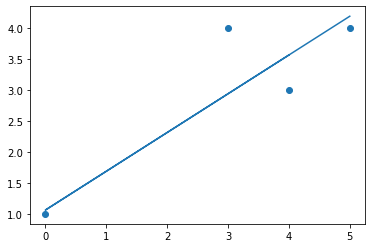

In [21]:
#GradientDescent => Performs gradient descent to learn theta
# theta0 = theta0 - alpha*(J)

def GradientDescent(x, y, theta, alpha, iterations):
    
    if len(theta) <=  2: #If theta has 2 or less variables 
        J_history = np.zeros(iterations) #create a variable showing the cost function
        
        for i in range(iterations):
            J1 = CostFunctionMulti(x, y, theta) #do the cost function
            theta = theta - (alpha*J1).T #then multiplied it by the step and change the value of theta 
        
            J_history[i] = CostFunction(x, y, theta) #show the cost function 
        
    else: #if theta has two or more variables (features)
        J_history = np.zeros([iterations,len(theta)])
    
        for i in range(iterations):
            J1 = CostFunctionMulti(x, y, theta)
            theta = theta - (alpha*J1).T
        
            J_history[i] = CostFunctionMulti(x, y, theta)
            
    return (theta,J_history)




#Example with only one feature
x, y, theta = Example_one_feature()
alpha = 0.1
iterations = 10

theta,J = GradientDescent(x, y, theta, alpha, iterations)
print(theta, J)

plt.scatter(x,y)
plt.plot(x,(theta[0]+theta[1]*x))




#Example with multiple features
x, y, theta = Example_multy_features()

theta,J = GradientDescent(x, y, theta, alpha, iterations)
print(theta, J)

# Regularization Gradient Decent

array([[ -1911784.40509049],
       [ -8495798.3611595 ],
       [-11180757.53354345],
       [ -9931813.74083887]])

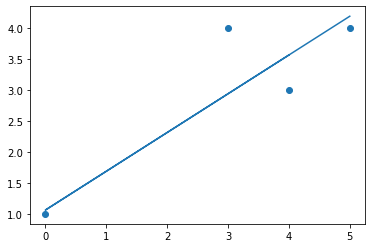

In [20]:
def GradientDescent_Reg(x, y, theta, alpha, iterations):
    
    if len(theta) <=  2: #If theta has 2 or less variables 
        J_history = np.zeros(iterations) #create a variable showing the cost function
        
        for i in range(iterations):
            J1 = CostFunctionMulti(x, y, theta) #do the cost function
            theta = theta - (alpha*J1).T #then multiplied it by the step and change the value of theta and the regularized method
        
            J_history[i] = CostFunction(x, y, theta) #show the cost function 
        
    else: #if theta has two or more variables (features)
        J_history = np.zeros([iterations,len(theta)])
    
        for i in range(iterations):
            J1 = CostFunctionMulti(x, y, theta)
            theta = theta - (alpha*J1).T
        
            J_history[i] = CostFunctionMulti(x, y, theta)
            
    return (theta,J_history)


#Example with only one feature
x, y, theta = Example_one_feature()
alpha = 0.1
iterations = 10

theta,J = GradientDescent_Reg(x, y, theta, alpha, iterations)
#print(theta, J)

plt.scatter(x,y)
plt.plot(x,(theta[0]+theta[1]*x))




#Example with multiple features
x, y, theta = Example_multy_features()

theta,J = GradientDescent_Reg(x, y, theta, alpha, iterations)
#print(theta, J)


J1 = CostFunctionMulti(x, y, theta) #do the cost function
theta = theta - (alpha*J1).T #then 

J1

theta

# Features Normalized

In [10]:
import numpy as np
import random

def NormalizedFeatures (x):
    #Normalized the Features in x by substarcting the mean and divided each one by the std
    mean = np.mean(x,axis=0)
    std = np.std(x,axis=0)
    
    x_norm = (x - mean) / std
    print(x_norm)
    
    return x_norm




#Example with x norm 
#Example with multiple features
Example_multy_features()
theta = np.array([[0.1], [0.2], [0.3], [0.4]])

x = NormalizedFeatures(x)

theta,J = GradientDescent(x, y, theta, alpha, iterations)
print(theta, J)

[[-1.43201389  0.75883666  1.46059349]
 [-1.10281529 -0.30000519  0.73029674]
 [-1.43201389 -0.65295247 -0.36514837]
 [ 1.53077347 -1.00589976 -0.73029674]
 [-1.43201389 -0.65295247 -0.36514837]
 [ 0.54317768  0.75883666  1.46059349]
 [-0.4444181  -0.30000519 -0.36514837]
 [ 1.53077347  0.40588938  0.36514837]
 [ 1.20157487  1.46473122 -1.09544512]
 [ 0.87237628  1.46473122  1.82574186]
 [-0.7736167   1.11178394 -0.36514837]
 [ 0.87237628  0.75883666  0.        ]
 [ 0.87237628 -0.65295247 -0.73029674]
 [ 1.20157487  0.40588938 -0.73029674]
 [-1.10281529  1.11178394 -1.46059349]
 [-0.11521951 -0.65295247  1.09544512]
 [-0.4444181  -1.71179432  0.73029674]
 [-0.4444181  -1.35884704 -1.09544512]
 [ 0.21397909  0.75883666  1.09544512]
 [-0.11521951 -1.71179432 -1.46059349]]
[[ 3.38917388]
 [-0.27570499]
 [-0.58707134]
 [ 0.90826101]] [[-4.545       0.73402646  1.20959097 -0.6064669 ]
 [-4.0905      0.6349003   1.09048991 -0.578013  ]
 [-3.68145     0.54816322  0.98452896 -0.54928308]
 [-3.